In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = [0,0.1,0.2,0.3,0.5,0.6,0.8,1]

In [3]:
data = []
for a in alpha:
    file = f"SAC_Pendulum-v1-t5000-alpha{a}-alpha_tuningFalse-stat.pkl"
    with open(file,"rb") as f:
        data_p = pickle.load(f)
        data.append(data_p)
        


In [5]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

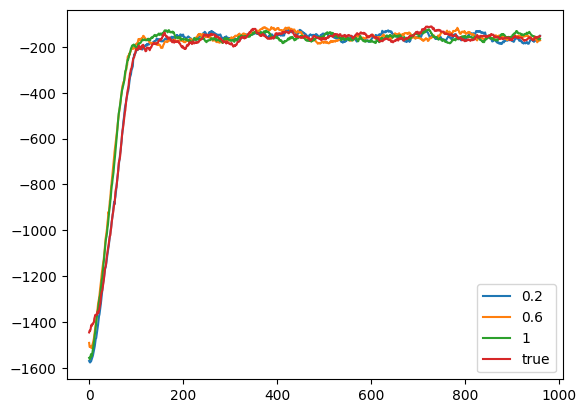

In [14]:
alpha2 = [0.2,0.6,1]
for a,d in zip(alpha2,data):
    r = d["rewards"][:1000]
    plt.plot(running_mean(r,40),label=a)
with open("SAC_Pendulum-v1-t5000-alpha1-alpha_tuningTrue-stat.pkl","rb") as f:
    d_l = pickle.load(f)
r_true = d_l["rewards"][:1000]
plt.plot(running_mean(r_true,40),label="true")
plt.legend()


In [2]:
f_lun = "SAC_LunarLander-v2-t5000-alpha1-alpha_tuningTrue-stat.pkl"
with open(f_lun, 'rb') as f:
    data_lun = pickle.load(f)


In [3]:
r_lun = data_lun["rewards"]
r_Q = data_lun["Q_loss"]
r_P = data_lun["P_loss"]

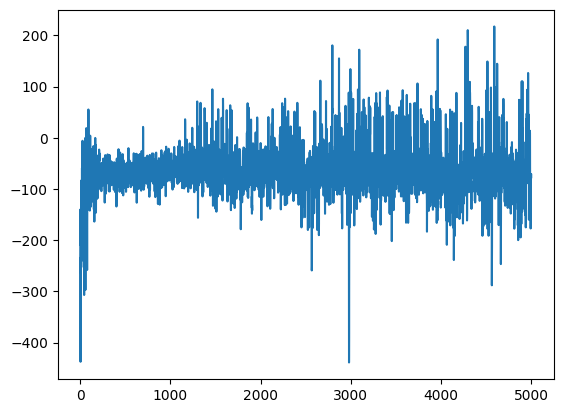

In [6]:
plt.plot(running_mean(r_lun,2))

In [7]:
file_name = "SAC_Pendulum-v1-t5000-alpha0-alpha_tuningFalse-stat.pkl"
with open(file_name, 'rb') as f:
    data = pickle.load(f)
    

In [8]:
alpha = [0,0.1,0.2,0.3,0.5,0.6,0.8,1]

In [9]:
alpha2 = [0,0.2,0.5,0.8,1]

In [10]:
file_name_list = [ f"SAC_Pendulum-v1-t5000-alpha{x}-alpha_tuningFalse-stat.pkl" for x in alpha2  ]
data_list = []
for name in file_name_list:
    with open(name, 'rb') as f:
        data1 = pickle.load(f)
        data_list.append(data1)

In [11]:
reward_list = [ d["rewards"] for d in data_list ]

In [12]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

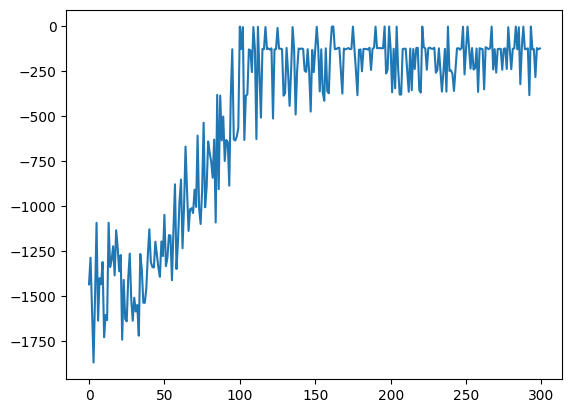

In [13]:
f_true = "SAC_Pendulum-v1-t5000-alpha1-alpha_tuningTrue-stat.pkl"
with open(f_true, 'rb') as f:
    data_true = pickle.load(f)
plt.plot(data_true["rewards"][:300])

In [17]:

for i, r in enumerate(reward_list):
    #plt.subplot(8,1,i+1)
    plt.plot(running_mean (r[:300], 1), label = alpha2[i])
plt.plot(running_mean(data_true["rewards"][:300],1),label="true")
plt.legend()

NameError: name 'reward_list' is not defined

In [15]:
p = [ [] for x in range(8)]

In [16]:
np.asanyarray

[[], [], [], [], [], [], [], []]

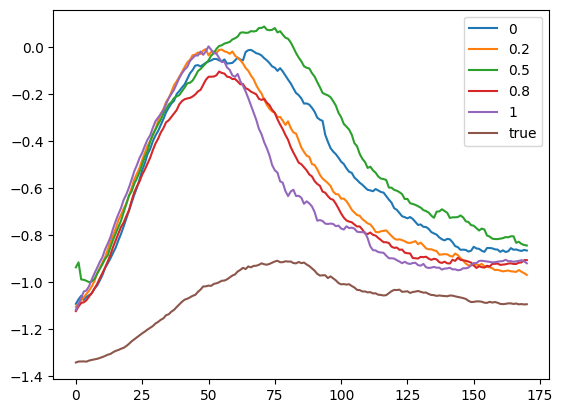

In [15]:
log_prob = [d["Log_Prob"] for d in data_list]
for i, r in enumerate(log_prob):
    #plt.subplot(8,1,i+1)
    plt.plot(running_mean (r[:200], 30), label = alpha2[i])
plt.plot(running_mean(data_true["Log_Prob"][:200],30),label="true")
plt.legend()

In [33]:
data.keys()

dict_keys(['rewards', 'lengths', 'random_seed', 'actor_lr', 'critic_lr', 'losses', 'Q_loss', 'P_loss', 'Log_Prob'])

In [34]:
loss = data["losses"]
rewards = data["rewards"]

In [35]:
loss =np.asanyarray(loss)

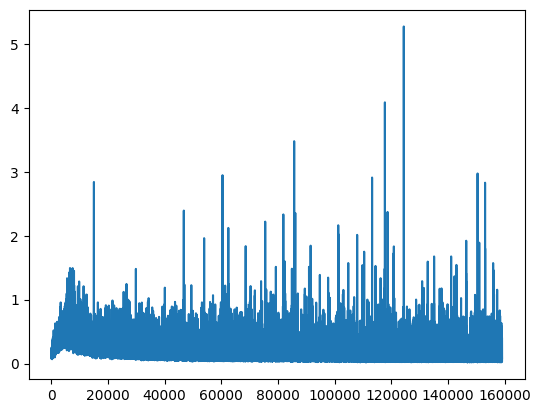

In [36]:
plt.plot(loss[1000:,0])


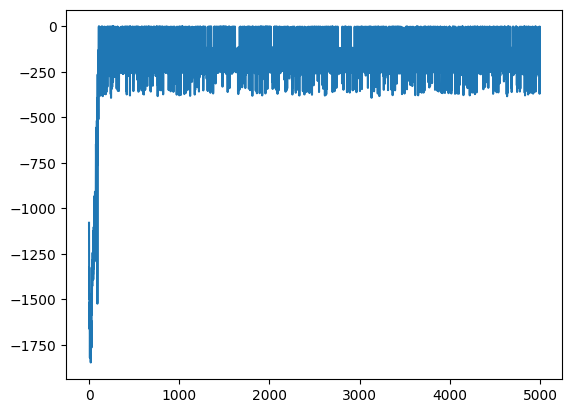

In [37]:
plt.plot(rewards)

In [38]:
loss

array([[8.97047577e+01, 3.89464527e-01],
       [7.36550064e+01, 9.85760927e-01],
       [6.04419212e+01, 1.59336269e+00],
       ...,
       [1.36237666e-01, 6.93759155e+00],
       [6.48448467e-02, 6.02251720e+00],
       [8.26377273e-02, 6.99618912e+00]])

In [39]:
f_lun8000 = "SAC_LunarLander-v2-t8000-alpha1-alpha_tuningTrue-stat.pkl"
with open(f_lun8000, 'rb') as f:
    data_lun8000 = pickle.load(f)

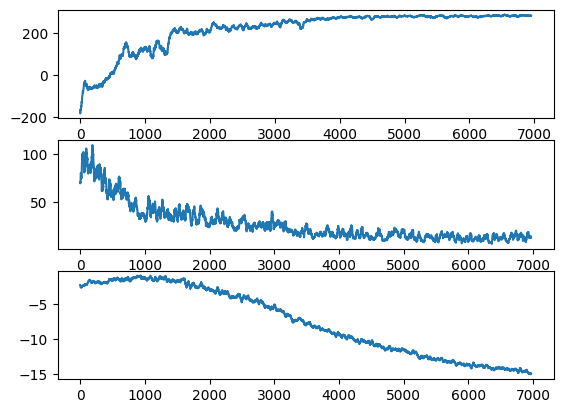

In [59]:
plt.subplot(3,1,1)
plt.plot(running_mean(data_lun8000["rewards"][:7000],50))
plt.subplot(3,1,2)
plt.plot(running_mean(data_lun8000["Q_loss"][:7000],30))
plt.subplot(3,1,3)
plt.plot(running_mean(data_lun8000["P_loss"][:7000],30))

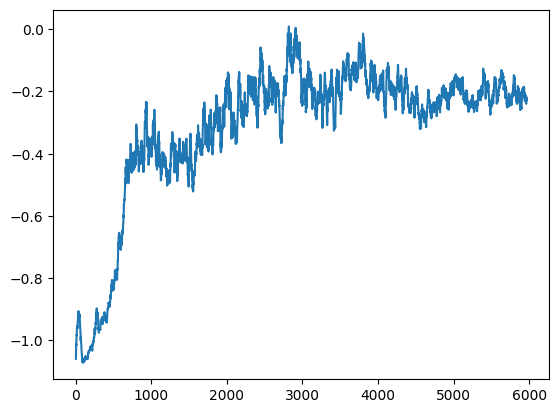

In [51]:
plt.plot(running_mean(data_lun8000["Log_Prob"][:6000],30))

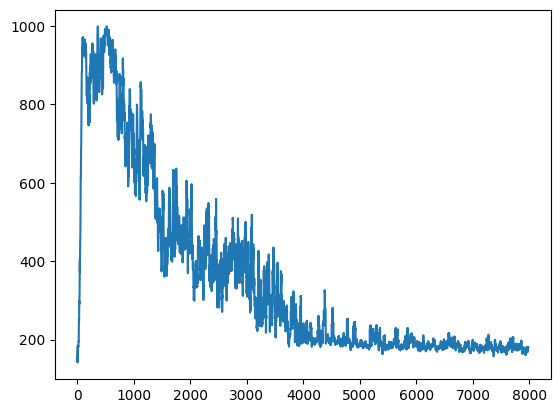

In [56]:
plt.plot(running_mean(data_lun8000["lengths"],20))